## Soccer Results Prediction - Poisson Model

source: https://dashee87.github.io/football/python/predicting-football-results-with-statistical-modelling/

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

In [71]:
epl_1617 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv")
epl_1617 = epl_1617[['HomeTeam','AwayTeam','FTHG','FTAG', 'FTR']]
epl_1617 = epl_1617.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals' , 'FTR' : 'Winner'})
epl_1617.head()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Winner
0,Burnley,Swansea,0,1,A
1,Crystal Palace,West Brom,0,1,A
2,Everton,Tottenham,1,1,D
3,Hull,Leicester,2,1,H
4,Man City,Sunderland,2,1,H


We use all the games from season 16/17 until the last 10 games to calculate the average goals of a team and the last 10 games we will try to predict.

In [4]:
epl_1617 = epl_1617[:-10]
epl_1617.mean()

HomeGoals    1.591892
AwayGoals    1.183784
dtype: float64

In [5]:
# probability of draw between home and away team
skellam.pmf(0.0,  epl_1617.mean()[0],  epl_1617.mean()[1])

0.24809376810717076

In [6]:
# probability of home team winning by one goal
skellam.pmf(1,  epl_1617.mean()[0],  epl_1617.mean()[1])

0.22706765807563964

In [8]:
# probability of home team winning by two goals
skellam.pmf(2,  epl_1617.mean()[0],  epl_1617.mean()[1])

0.14180866650031265

Since we are assuming that the number of goals scored by each team are independent events. Therefore, each event has its own Poisson distribution and the difference of two Poisson distributions is a Skellam distribution, which we ae using to model the results in the follwoing cell.

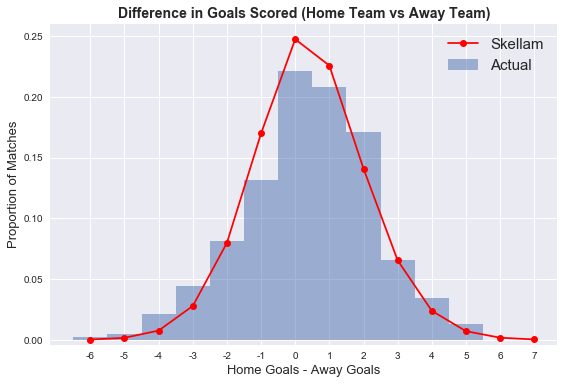

In [96]:
skellam_pred = [skellam.pmf(i,  epl_1617.mean()[0],  epl_1617.mean()[1]) for i in range(-6,8)]

plt.hist(epl_1617[['HomeGoals']].values - epl_1617[['AwayGoals']].values, range(-6,8), 
         alpha=0.5, label='Actual',normed=True)
plt.plot([i+0.5 for i in range(-6,8)], skellam_pred,
                  linestyle='-', marker='o',label="Skellam", color = 'r')
plt.legend(loc='upper right', fontsize=15)
plt.xticks([i+0.5 for i in range(-6,8)],[i for i in range(-6,8)])
plt.xlabel("Home Goals - Away Goals",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Difference in Goals Scored (Home Team vs Away Team)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()

The way this works is the we have to figure out the average goals scored by each team and feed this into the Poisson model. We assume that the number of goals scored by each team is Poisson distributed. To show that we can model the goals scored in season 16/17 by two teams in this case Chelsea and West Brom. We seperate the data into goals scored home and away.

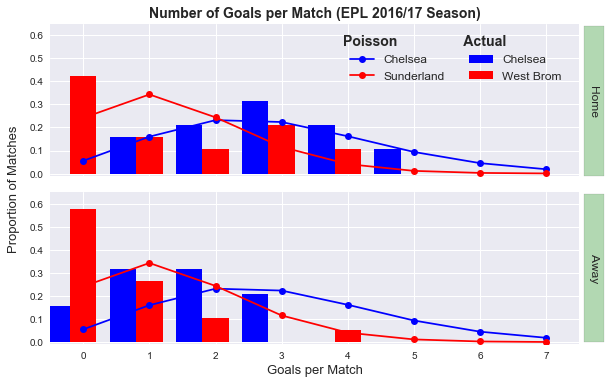

In [103]:
fig,(ax1,ax2) = plt.subplots(2, 1)


chel_home = epl_1617[epl_1617['HomeTeam']=='Chelsea'][['HomeGoals']].apply(pd.value_counts,normalize=True)
chel_home_pois = [poisson.pmf(i,np.sum(np.multiply(chel_home.values.T,chel_home.index.T),axis=1)[0]) for i in range(8)]
sun_home = epl_1617[epl_1617['HomeTeam']=='West Brom'][['HomeGoals']].apply(pd.value_counts,normalize=True)
sun_home_pois = [poisson.pmf(i,np.sum(np.multiply(sun_home.values.T,sun_home.index.T),axis=1)[0]) for i in range(8)]

chel_away = epl_1617[epl_1617['AwayTeam']=='Chelsea'][['AwayGoals']].apply(pd.value_counts,normalize=True)
chel_away_pois = [poisson.pmf(i,np.sum(np.multiply(chel_home.values.T,chel_home.index.T),axis=1)[0]) for i in range(8)]
sun_away = epl_1617[epl_1617['AwayTeam']=='Sunderland'][['AwayGoals']].apply(pd.value_counts,normalize=True)
sun_away_pois = [poisson.pmf(i,np.sum(np.multiply(sun_home.values.T,sun_home.index.T),axis=1)[0]) for i in range(8)]

ax1.bar(chel_home.index-0.4,chel_home.values,width=0.4,color="b",label="Chelsea")
ax1.bar(sun_home.index,sun_home.values,width=0.4,color="r",label="West Brom")
pois1, = ax1.plot([i for i in range(8)], chel_home_pois,
                  linestyle='-', marker='o',label="Chelsea", color = "b")
pois1, = ax1.plot([i for i in range(8)], sun_home_pois,
                  linestyle='-', marker='o',label="Sunderland", color = "r")
leg=ax1.legend(loc='upper right', fontsize=12, ncol=2)
leg.set_title("Poisson                 Actual                ", prop = {'size':'14', 'weight':'bold'})
ax1.set_xlim([-0.5,7.5])
ax1.set_ylim([-0.01,0.65])
ax1.set_xticklabels([])
ax1.text(7.65, 0.585, '                Home                ', rotation=-90,
        bbox={'facecolor':'g', 'alpha':0.3, 'pad':5})
ax2.text(7.65, 0.585, '                Away                ', rotation=-90,
        bbox={'facecolor':'g', 'alpha':0.3, 'pad':5})

ax2.bar(chel_away.index-0.4,chel_away.values,width=0.4,color="b",label="Chelsea")
ax2.bar(sun_away.index,sun_away.values,width=0.4,color="r",label="Sunderland")
pois1, = ax2.plot([i for i in range(8)], chel_away_pois,
                  linestyle='-', marker='o',label="Chelsea", color = "b")
pois1, = ax2.plot([i for i in range(8)], sun_away_pois,
                  linestyle='-', marker='o',label="Sunderland", color = "r")
ax2.set_xlim([-0.5,7.5])
ax2.set_ylim([-0.01,0.65])
ax1.set_title("Number of Goals per Match (EPL 2016/17 Season)",size=14,fontweight='bold')
ax2.set_xlabel("Goals per Match",size=13)
ax2.text(-1.15, 0.9, 'Proportion of Matches', rotation=90, size=13)
plt.tight_layout()
plt.show()

The graph above proves our assumption that the goals scored by a team are roughly Poisson distributed. 

## The model

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [13]:
goal_model_data = pd.concat([epl_1617[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           epl_1617[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  740
Model:                            GLM   Df Residuals:                      700
Model Family:                 Poisson   Df Model:                           39
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1042.4
Date:                Wed, 15 Nov 2017   Deviance:                       776.11
Time:                        11:17:26   Pearson chi2:                     659.
No. Iterations:                     5                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3725      0.198      1.880      0.060      -0.016       0.761
team[T.Bournemouth]           -0.2891      0.179     -1.612      0.107      -0.641       0.062
team[T.Burnley]               -0.6458      0.200     -3.230      0.001      -1.038      -0.254
team[T.Chelsea]                0.0789      0.162      0.488      0.626      -0.238       0.396
team[T.Crystal Palace]        -0.3865      0.183     -2.107      0.035      -0.746      -0.027
team[T.Everton]               -0.2008      0.173     -1.161      0.246      -0.540       0.138
team[T.Hull]                  -0.7006      0.204     -3.441      0.001      -1.100      -0.302
team[T.Leicester]             -0.4204      0.187     -2.249      0.025      -0.787      -0.054
team[T.Liverpool]              0.0162      0.164      0.099      0.921      -0.306       0.338
team[T.Man City]               0.0117      0.164      0.072      0.943      -0.310       0.334
team[T.Man United]            -0.3572      0.181     -1.971      0.049      -0.713      -0.002
team[T.Middlesbrough]         -1.0087      0.225     -4.481      0.000      -1.450      -0.568
team[T.Southampton]           -0.5804      0.195     -2.976      0.003      -0.963      -0.198
team[T.Stoke]                 -0.6082      0.197     -3.094      0.002      -0.994      -0.223
team[T.Sunderland]            -0.9619      0.222     -4.329      0.000      -1.397      -0.526
team[T.Swansea]               -0.5136      0.192     -2.673      0.008      -0.890      -0.137
team[T.Tottenham]              0.0532      0.162      0.328      0.743      -0.265       0.371
team[T.Watford]               -0.5969      0.197     -3.035      0.002      -0.982      -0.211
team[T.West Brom]             -0.5567      0.194     -2.876      0.004      -0.936      -0.177
team[T.West Ham]              -0.4802      0.189     -2.535      0.011      -0.851      -0.109
opponent[T.Bournemouth]        0.4109      0.196      2.092      0.036       0.026       0.796
opponent[T.Burnley]            0.1657      0.206      0.806      0.420      -0.237       0.569
opponent[T.Chelsea]           -0.3036      0.234     -1.298      0.194      -0.762       0.155
opponent[T.Crystal Palace]     0.3287      0.200      1.647      0.100      -0.062       0.720
opponent[T.Everton]           -0.0442      0.218     -0.202      0.840      -0.472       0.384
opponent[T.Hull]               0.4979      0.193      2.585      0.010       0.120       0.875
opponent[T.Leicester]          0.3369      0.199      1.694      0.090      -0.053       0.727
opponent[T.Liverpool]         -0.0374      0.217     -0.172      0.863      -0.463       0.389
opponent[T.Man City]          -0.0993      0.222     -0.448      0.654      -0.534       0.335
opponent[T.Man United]        -0.4220      0.241     -1.754      0.079      -0.894       0.050
opponent[T.Middlesbrough]  

Considering the table above the most interesting aspect is the coefficient (exponent of the parameter values) column, which corresponds to the slope of the linear regression. This means a value close to 0 is a very neutral effect ( $ e^0 = 1 $). The last row shows the home team coefficient of 0.2969, which means that the home team is more likely to score goals than the away team ( $ e^0.2969 = 1.35 $ time more likely).  When we compare two team for example Chelsea (0.0789) and West Brom (-0.5567) the coefficient value tells us that Chalsea scores more goals than the average while West Brom scores less goals than the average. 

The second half ot the table shows the opponent* values. Those values either penalize or reward a team. Those vales take into consideration the defensice strenght of a team. If a team plays against Chelsea for example it will get penalized by 0.3036. 

In order to predict a game we first have to calculate the expected average number of goals scored by each team considering the the opponents defensive strength. In this case the next Chelsea game in 16/17 is against Sunderland.

In [14]:
poisson_model.predict(pd.DataFrame(data={'team': 'Chelsea', 'opponent': 'Sunderland',
                                       'home':1},index=[1]))

1    3.061662
dtype: float64

In [15]:
poisson_model.predict(pd.DataFrame(data={'team': 'Sunderland', 'opponent': 'Chelsea',
                                       'home':0},index=[1]))

1    0.409373
dtype: float64

We can now use those two Poisson distributions to predict multiple scores of the game. For visulization reasons we choose every possible score with max. 3 goals for each team.

In [9]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

In [17]:
simulate_match(poisson_model, 'Chelsea', 'Sunderland', max_goals=3)

array([[ 0.03108485,  0.01272529,  0.00260469,  0.00035543],
       [ 0.0951713 ,  0.03896054,  0.00797469,  0.00108821],
       [ 0.14569118,  0.059642  ,  0.01220791,  0.00166586],
       [ 0.14868571,  0.06086788,  0.01245883,  0.0017001 ]])

The diagonal (left top to right bottom) is the probability of all draws starting with 0:0 in the top left corner. All the probabilities of wins for chelesa are loacted in the bottom left trilangular matrix while Sunderlands wins are located in the top right. The matrix is organized in the following way considering Chelese goals:Sunderland goals 

$$ \begin{bmatrix} 0:0 & 0:1 & 0:2 & 0:3 \\
1:0 & 1:1 & 1:2 & 1:3 \\
2:0 & 2:1 & 2:2 & 2:3 \\
3:0 & 3:1 & 3:2 & 3:3 \end{bmatrix} $$

To predict the probabilities of win, draw, and loss from chelseas perspective you can just sum up the values of lover triangel, diagonal, upper triangle respectively.

In [18]:
chel_sun = simulate_match(poisson_model, "Chelsea", "Sunderland", max_goals=10)

In [19]:
# chelsea win
np.sum(np.tril(chel_sun, -1))

0.88859866123641451

In [20]:
# draw
np.sum(np.diag(chel_sun))

0.084093492686495269

In [21]:
# sunderland win
np.sum(np.triu(chel_sun, 1))

0.026961819942852801

## Prediction and betting simulation for last 10 games of season 2016/2017

For this simulation I will bet every time the away of home team wins with a probability P > 0.55. The simulation will assume that we bet the same part of x dollars on each game.

In [57]:
def simulate(season, x):
    
    epl = pd.read_csv("http://www.football-data.co.uk/mmz4281/{}/E0.csv".format(season))
    epl = epl[['HomeTeam','AwayTeam','FTHG','FTAG', 'FTR', 'B365H', 'B365A']]
    epl = epl.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals' , 'FTR' : 'Winner'})
    goal_model_data = pd.concat([epl[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           epl[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

    poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                            family=sm.families.Poisson()).fit()
    
    epl_matches = epl[['HomeTeam','AwayTeam']]
    epl_matches = epl_matches[-10:]
    epl_winner = epl[['Winner']]
    epl_odds = epl[['B365H', 'B365A']]

    #print(epl_matches)
    bets = []
    results = []
    odds = []
    payout = 0
    
    for i in range(371,380):
        matrix = simulate_match(poisson_model, epl_matches['HomeTeam'][i], epl_matches['AwayTeam'][i], max_goals=10)
        home_win = np.sum(np.tril(matrix, -1))
        draw = np.sum(np.diag(matrix))
        away_win = np.sum(np.triu(matrix, 1))
        if home_win > 0.55:
            bets.append('H')
            results.append(epl_winner['Winner'][i])
            odds.append((float)(epl_odds['B365H'][i]))
        elif away_win > 0.55:
            bets.append('A')
            results.append(epl_winner['Winner'][i])
            odds.append((float)(epl_odds['B365A'][i]))

    for k in range(0, len(bets)):
        if bets[k] == results[k]:
            payout += (odds[k]*(x/len(bets)))
        else:
            payout -= x/len(bets)
        #print("Payout after bet {}: {}".format(k+1,payout))
    
    #print(bets)
    #print(results)
    return payout

In [26]:
#simulate last 10 games of season 16/17
x = 1000
season = '1617'
total_payout = simulate(season, x)
win_percent = ((total_payout / x) - 1)*100

print('Total payout for season {} is {} and the win is {}%'.format(season, total_payout, win_percent))

        HomeTeam        AwayTeam
370      Arsenal         Everton
371      Burnley        West Ham
372      Chelsea      Sunderland
373         Hull       Tottenham
374    Leicester     Bournemouth
375    Liverpool   Middlesbrough
376   Man United  Crystal Palace
377  Southampton           Stoke
378      Swansea       West Brom
379      Watford        Man City
Payout after bet 1: 227.99999999999997
Payout after bet 2: 528.0
Payout after bet 3: 756.0
Payout after bet 4: 1256.0
Payout after bet 5: 1516.0
['H', 'A', 'H', 'H', 'A']
['H', 'A', 'H', 'H', 'A']
Total payout for season 1617 is 1516.0 and the win is 51.6%


In [27]:
#simulate last 10 games of season 15/16
x = 1000
season = '1516'
total_payout = simulate(season, x)
win_percent = ((total_payout / x) - 1)*100

print('Total payout for season {} is {} and the win is {}%'.format(season, total_payout, win_percent))

        HomeTeam        AwayTeam
370      Arsenal     Aston Villa
371      Chelsea       Leicester
372      Everton         Norwich
373    Newcastle       Tottenham
374  Southampton  Crystal Palace
375        Stoke        West Ham
376      Swansea        Man City
377      Watford      Sunderland
378    West Brom       Liverpool
379   Man United     Bournemouth
Payout after bet 1: 450.0
Payout after bet 2: 200.0
Payout after bet 3: 540.0
Payout after bet 4: 957.5
['H', 'A', 'H', 'H']
['H', 'H', 'H', 'H']
Total payout for season 1516 is 957.5 and the win is -4.249999999999998%


In [28]:
#simulate last 10 games of season 14/15
x = 1000
season = '1415'
total_payout = simulate(season, x)
win_percent = ((total_payout / x) - 1)*100

print('Total payout for season {} is {} and the win is {}%'.format(season, total_payout, win_percent))

           HomeTeam     AwayTeam
371     Aston Villa      Burnley
372         Chelsea   Sunderland
373  Crystal Palace      Swansea
374         Everton    Tottenham
375            Hull   Man United
376       Leicester          QPR
377        Man City  Southampton
378       Newcastle     West Ham
379           Stoke    Liverpool
380             NaN          NaN
Payout after bet 1: 680.0
Payout after bet 2: 1480.0
['H', 'H']
['H', 'H']
Total payout for season 1415 is 1480.0 and the win is 48.0%


In [29]:
#simulate last 10 games of season 13/14
x = 1000
season = '1314'
total_payout = simulate(season, x)
win_percent = ((total_payout / x) - 1)*100

print('Total payout for season {} is {} and the win is {}%'.format(season, total_payout, win_percent))

        HomeTeam        AwayTeam
370      Cardiff         Chelsea
371       Fulham  Crystal Palace
372         Hull         Everton
373    Liverpool       Newcastle
374     Man City        West Ham
375      Norwich         Arsenal
376  Southampton      Man United
377   Sunderland         Swansea
378    Tottenham     Aston Villa
379    West Brom           Stoke
Payout after bet 1: 305.0
Payout after bet 2: 597.5
Payout after bet 3: 1060.0
Payout after bet 4: 1435.0
['H', 'H', 'A', 'H']
['H', 'H', 'A', 'H']
Total payout for season 1314 is 1435.0 and the win is 43.50000000000001%


In [30]:
#simulate last 10 games of season 12/13
x = 1000
season = '1213'
total_payout = simulate(season, x)
win_percent = ((total_payout / x) - 1)*100

print('Total payout for season {} is {} and the win is {}%'.format(season, total_payout, win_percent))

        HomeTeam     AwayTeam
370      Chelsea      Everton
371    Liverpool          QPR
372     Man City      Norwich
373    Newcastle      Arsenal
374  Southampton        Stoke
375      Swansea       Fulham
376    Tottenham   Sunderland
377    West Brom   Man United
378     West Ham      Reading
379        Wigan  Aston Villa
Payout after bet 1: 208.33333333333331
Payout after bet 2: 41.66666666666666
Payout after bet 3: 300.0
Payout after bet 4: 515.0
Payout after bet 5: 348.33333333333337
Payout after bet 6: 626.6666666666667
['H', 'H', 'A', 'H', 'A', 'H']
['H', 'A', 'A', 'H', 'D', 'H']
Total payout for season 1213 is 626.6666666666667 and the win is -37.33333333333333%


Total payout over 10 seasons is: 504.33333333333394
This is 5.043333333333339%


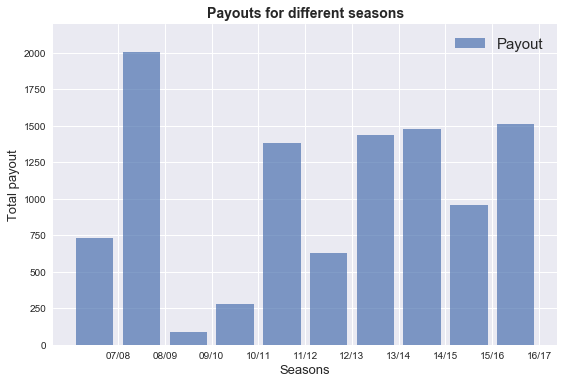

In [58]:
payouts = []
x = 1000
for i in range(708,1718,101):
    if i < 1011:
        payouts.append(simulate('0'+str(i),x))
    else:
        payouts.append(simulate(str(i),x))

print("Total payout over 10 seasons is: {}".format(np.sum(payouts)-(x*len(payouts))))
print("This is {}%".format(((np.sum(payouts)-(x*len(payouts)))*100)/(x*len(payouts))))

x = np.arange(10)
plt.bar(x, height= payouts, label='Payout', alpha=0.7)
plt.xticks(x+.5, ['07/08','08/09','09/10','10/11','11/12','12/13','13/14','14/15','15/16','16/17']);
plt.legend(loc='upper right', fontsize=15)
plt.xlabel("Seasons",size=13)
plt.ylabel("Total payout",size=13)
plt.title("Payouts for different seasons",size=14,fontweight='bold')
plt.tight_layout()
plt.ylim(0,2200)
plt.show()
